In [19]:
from helper import get_preprocessed_data
from torchvision import transforms

train_path = "/workspace/Comp/Datasets/Project/training/images"
groundtruth_path = "/workspace/Comp/Datasets/Project/training/groundtruth"

## Image to Tensor and then resized to multiple of 32
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((416, 416)),
])


X, Y = get_preprocessed_data(train_path, transform, groundtruth_path)
print(X.shape, Y.shape)

torch.Size([144, 3, 416, 416]) torch.Size([144, 1, 416, 416])


In [20]:
import torch

model = torch.load('/workspace/Comp/Models/deeplabv3resnet152.pth')

loader = torch.utils.data.DataLoader(list(zip(X, Y)), batch_size=8, shuffle=False)

/tmp/ipykernel_40800/494003996.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/workspace/Comp/Models/deeplabv3resnet152.pth')


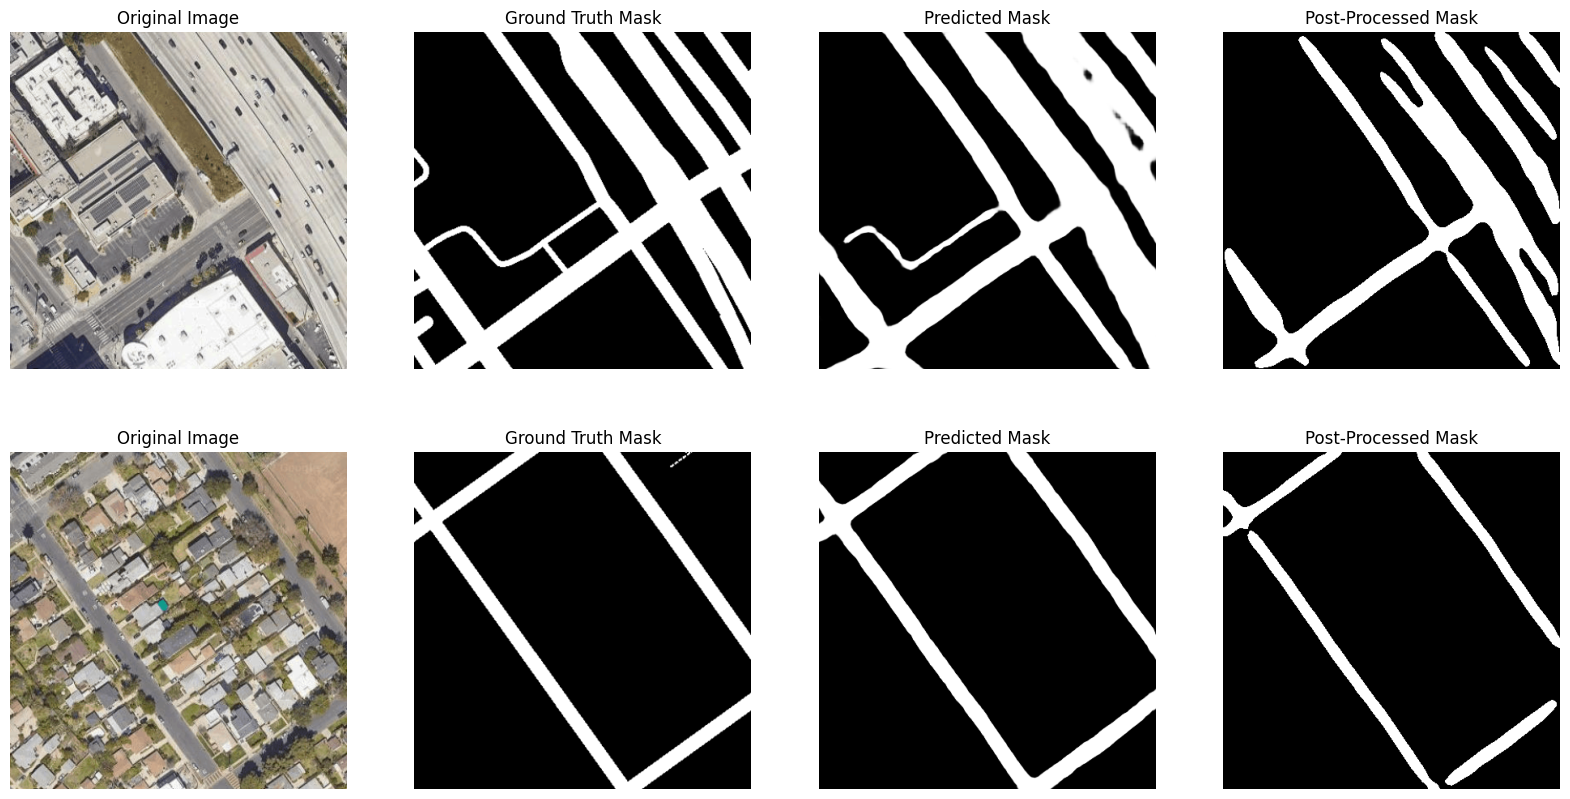

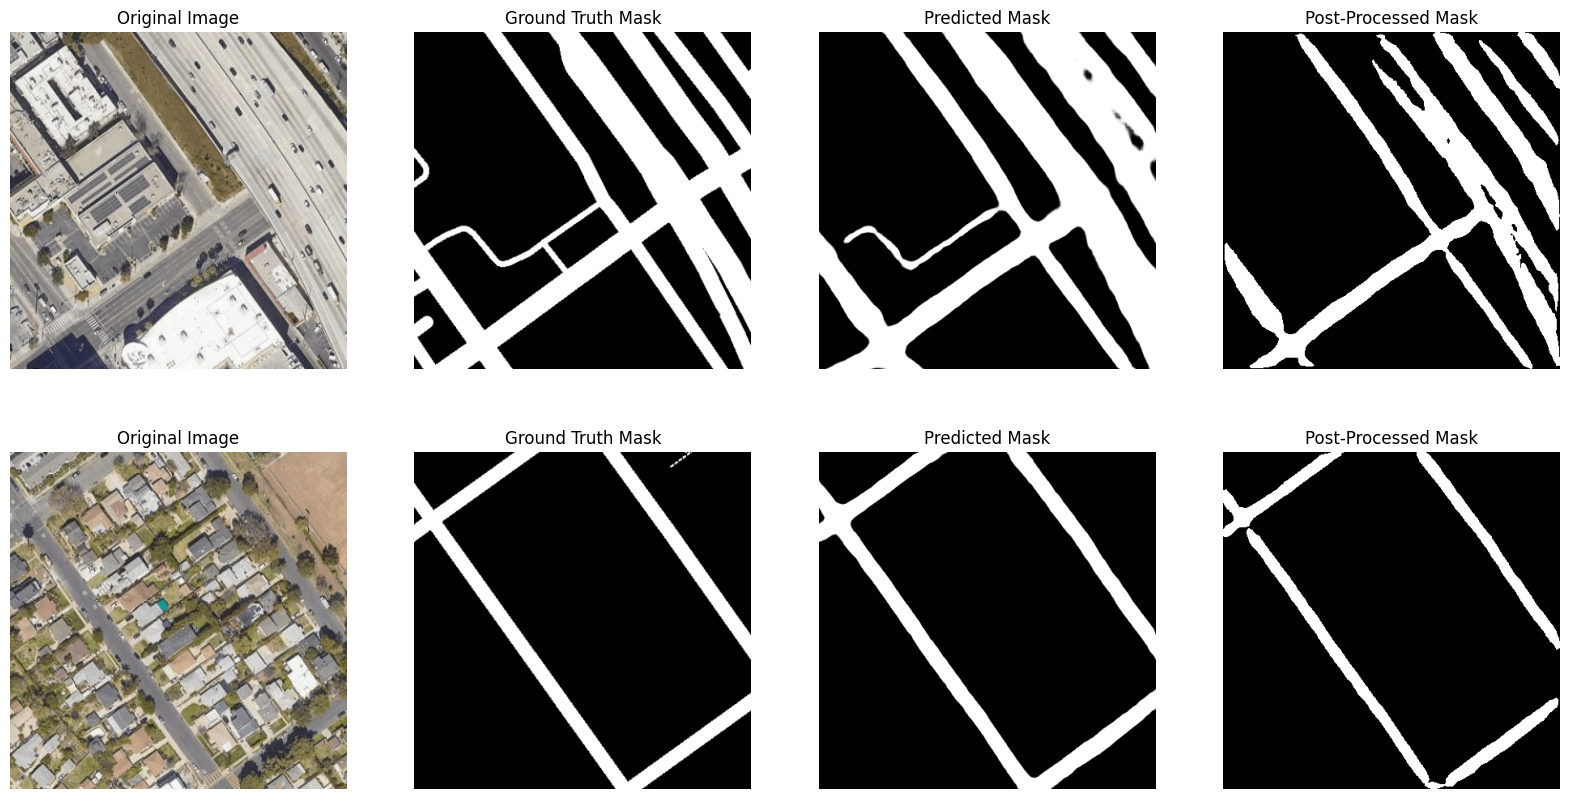

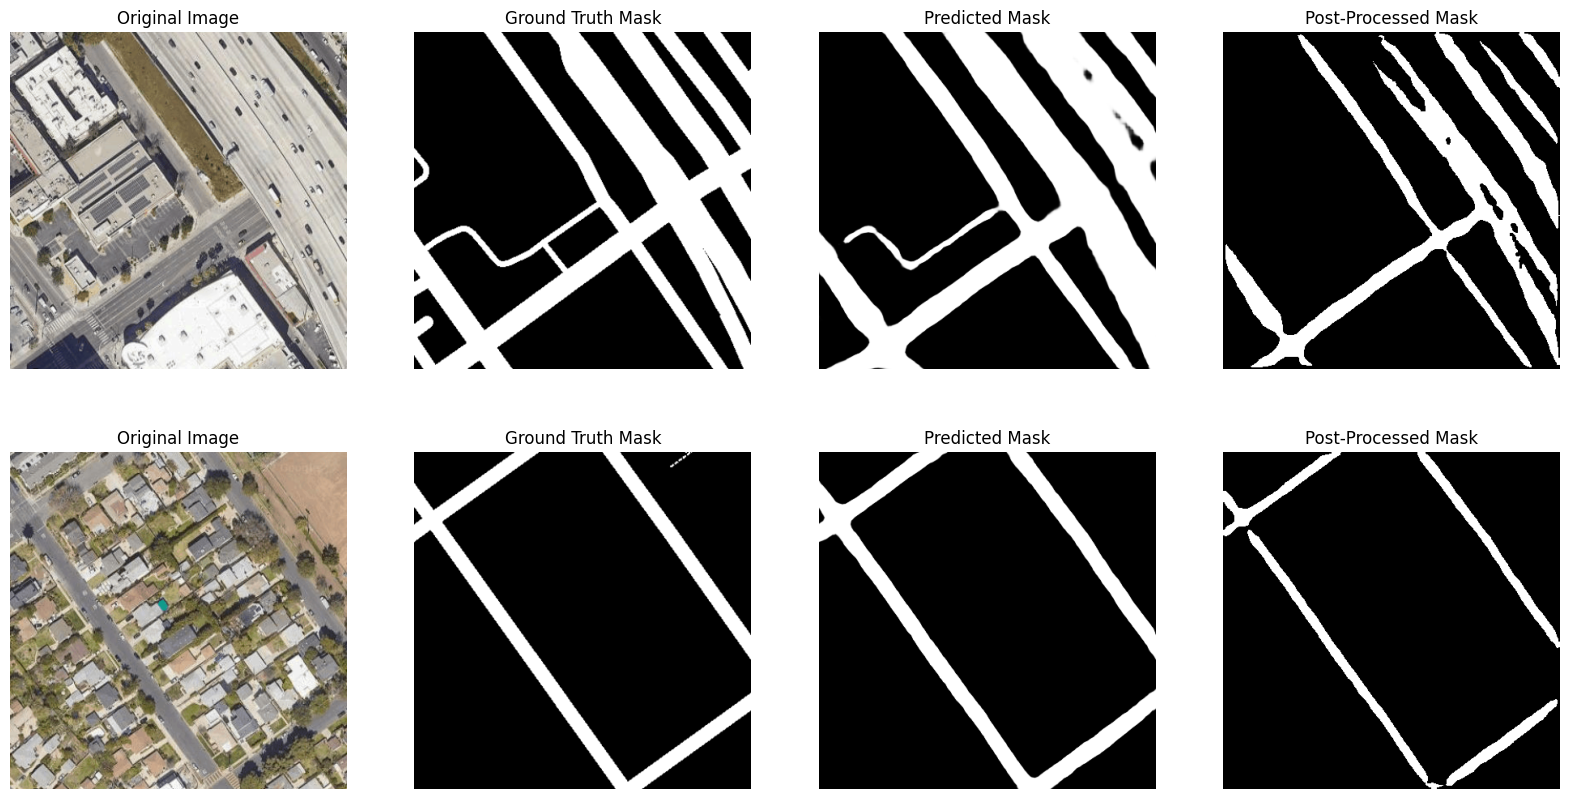

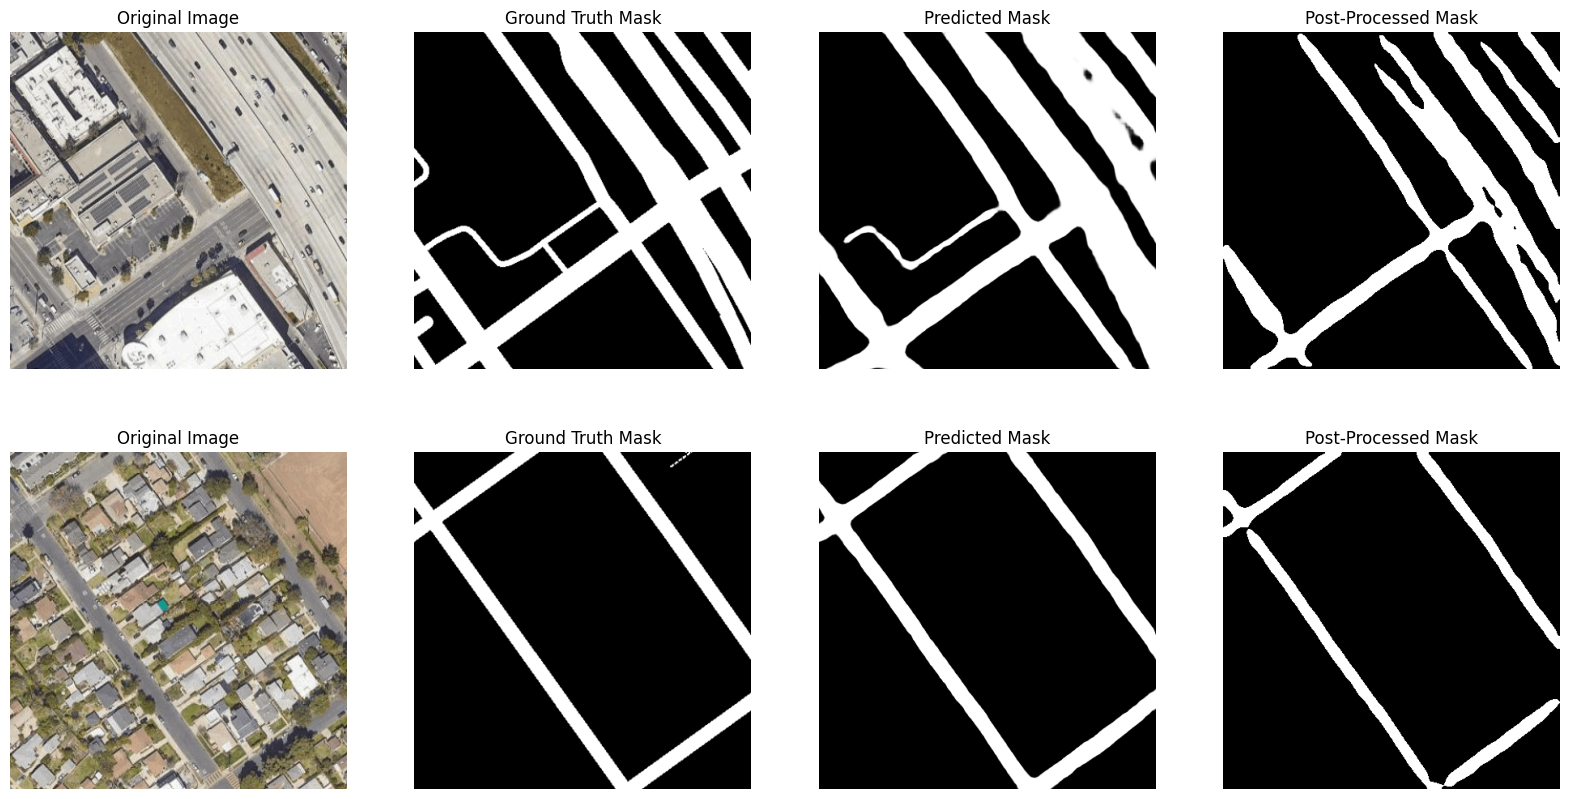

In [21]:
## Visualize prediction after median blurring

from helper import visualize_predictions
from postprocessing import median_blurring, remove_small_connected_objects, small_kernel_erosion, gaussian_blurring


visualize_predictions(model, loader, median_blurring, num_images=2)
visualize_predictions(model, loader, remove_small_connected_objects, num_images=2)
visualize_predictions(model, loader, small_kernel_erosion, num_images=2)
visualize_predictions(model, loader, gaussian_blurring, num_images=2)


In [22]:
from helper import get_f1_score
from postprocessing import median_blurring, remove_small_connected_objects, small_kernel_erosion, gaussian_blurring

f1_scores = {
    'no post processing' : get_f1_score(model, loader),
    'median_blurring' : get_f1_score(model, loader, median_blurring),
    'gaussian_blurring' : get_f1_score(model, loader, gaussian_blurring),
    'remove_small_connected_objects' : get_f1_score(model, loader, remove_small_connected_objects),
    'small_kernel_erosion' : get_f1_score(model, loader, small_kernel_erosion),
}

print(f1_scores)

{'no post processing': 0.8527881242641989, 'median_blurring': 0.7674207196027418, 'gaussian_blurring': 0.7746315043420569, 'remove_small_connected_objects': 0.7745207055834445, 'small_kernel_erosion': 0.6997917129784003}
